In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv(r'Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [4]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [5]:
df['Length'].max()

149

In [6]:
df[df['Length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [7]:
def text_process(msg):
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [8]:
df['Tokenized Review'] = df['Review'].apply(text_process)

In [9]:
df.head()

,Review,Liked,Length,Tokenized Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


# Visualize Positive Comments Through WordCloud

In [10]:
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

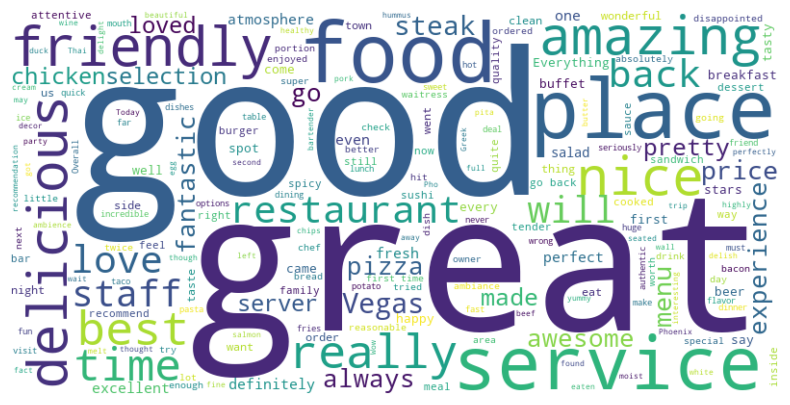

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualize Negaitive Comments Through WordCloud

In [13]:
word_cloud = df.loc[df['Liked'] == 0,:]
text = ' '.join([text for text in word_cloud['Review']])

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

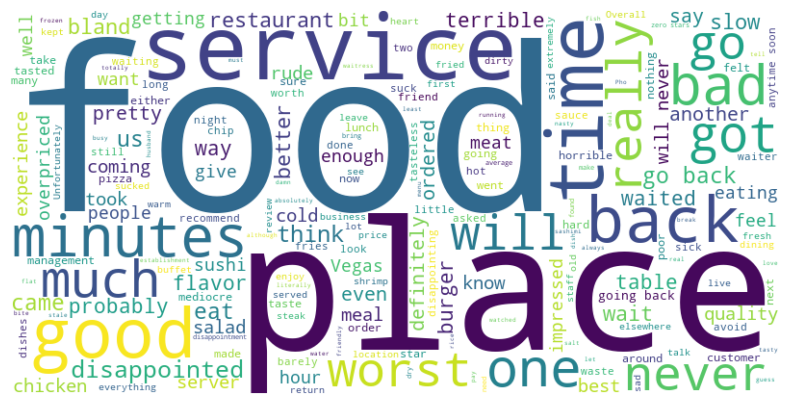

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
vectorizer = CountVectorizer(max_df = 0.9, min_df =10)
x = vectorizer.fit_transform(df['Tokenized Review']).toarray()

In [17]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df['Tokenized Review'], df['Liked'], random_state=107, test_size=0.2)

In [19]:
x_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: Tokenized Review, dtype: object

In [20]:
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_test)

In [21]:
x_train_array = train_vectorized.toarray()
x_test_array = test_vectorized.toarray()

# GaussianNB

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb = GaussianNB()
nb.fit(x_train_array, y_train)

GaussianNB()

In [24]:
y_train_preds_nb = nb.predict(x_train_array)
y_test_preds_nb = nb.predict(x_test_array)

In [25]:
y_test_preds_nb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [26]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [27]:
pd.DataFrame({'actual_y_value': y_test, 'predicted_y_value': y_test_preds_nb})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

In [29]:
def print_metrics(actual, predicted):
    print(f'Accuracy Score is : {accuracy_score(actual, predicted)}')
    print(f'Precision Score is : {precision_score(actual, predicted)}')
    print(f'Recall Score is : {recall_score(actual, predicted)}')
    print(f'F1 Score is : {f1_score(actual, predicted)}')
    print(f'ROC AUC Score is : {roc_auc_score(actual, predicted)}')
    print(f'Confusion Matrix is : {confusion_matrix(actual, predicted)}')
    print(f'Classification Report : {classification_report(actual, predicted)}')

In [30]:
print_metrics(y_train, y_train_preds_nb)

Accuracy Score is : 0.76375
Precision Score is : 0.8403908794788274
Recall Score is : 0.6482412060301508
F1 Score is : 0.7319148936170213
ROC AUC Score is : 0.7631753293832346
Confusion Matrix is : [[353  49]
 [140 258]]
Classification Report :               precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.84      0.65      0.73       398

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800



In [31]:
print_metrics(y_test, y_test_preds_nb)

Accuracy Score is : 0.725
Precision Score is : 0.8133333333333334
Recall Score is : 0.5980392156862745
F1 Score is : 0.6892655367231638
ROC AUC Score is : 0.7275910364145659
Confusion Matrix is : [[84 14]
 [41 61]]
Classification Report :               precision    recall  f1-score   support

           0       0.67      0.86      0.75        98
           1       0.81      0.60      0.69       102

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



# MultinomialNB

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
mnv = MultinomialNB()
mnv.fit(x_train_array, y_train)

MultinomialNB()

In [34]:
y_train_preds_mnv = mnv.predict(x_train_array)
y_test_preds_mnv = mnv.predict(x_test_array)

In [35]:
y_test_preds_mnv

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [36]:
print_metrics(y_train, y_train_preds_mnv)

Accuracy Score is : 0.77
Precision Score is : 0.8092485549132948
Recall Score is : 0.7035175879396985
F1 Score is : 0.7526881720430108
ROC AUC Score is : 0.7696692417310432
Confusion Matrix is : [[336  66]
 [118 280]]
Classification Report :               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.81      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [37]:
print_metrics(y_test, y_test_preds_mnv)

Accuracy Score is : 0.745
Precision Score is : 0.7802197802197802
Recall Score is : 0.696078431372549
F1 Score is : 0.7357512953367875
ROC AUC Score is : 0.7459983993597439
Confusion Matrix is : [[78 20]
 [31 71]]
Classification Report :               precision    recall  f1-score   support

           0       0.72      0.80      0.75        98
           1       0.78      0.70      0.74       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



# Hyper Parameter Tuning

In [40]:
best_accuracy = 0.0
alpha_val = 0

for i in np.arange(0.01, 1.1, 0.1):
    temp_cls = MultinomialNB(alpha=i)
    temp_cls.fit(x_train_array, y_train)
    y_test_pred_h_nbayes = temp_cls.predict(x_test_array)
    score = accuracy_score(y_test, y_test_pred_h_nbayes)
    print(f'Accuracy score for alpha : {round(i,1)} is : {round(score*100,2)}%')
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
        
print(f'\nThe best Accuracy is : {round(best_accuracy*100,2)}% with alpha value as {round(alpha_val,1)}')

Accuracy score for alpha : 0.0 is : 75.5%
Accuracy score for alpha : 0.1 is : 75.5%
Accuracy score for alpha : 0.2 is : 75.0%
Accuracy score for alpha : 0.3 is : 74.0%
Accuracy score for alpha : 0.4 is : 74.5%
Accuracy score for alpha : 0.5 is : 74.5%
Accuracy score for alpha : 0.6 is : 74.5%
Accuracy score for alpha : 0.7 is : 74.5%
Accuracy score for alpha : 0.8 is : 74.5%
Accuracy score for alpha : 0.9 is : 74.5%
Accuracy score for alpha : 1.0 is : 74.5%

The best Accuracy is : 75.5% with alpha value as 0.0


# Bernoulli NB

In [41]:
from sklearn.naive_bayes import BernoulliNB

In [43]:
classifier = BernoulliNB(alpha=0.8)
classifier.fit(x_train_array, y_train)

BernoulliNB(alpha=0.8)

In [44]:
y_pred = classifier.predict(x_test_array)

In [47]:
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))



Accuracy is  75.5 %
Precision is  0.79
Recall is  0.71


# Logistic Regression

In [48]:
from sklearn import linear_model

In [50]:
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(x_train_array, y_train)

LogisticRegression(C=1.5)

In [52]:
y_pred = classifier.predict(x_test_array)

In [53]:
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))



Accuracy is  76.5 %
Precision is  0.79
Recall is  0.74


# Using Gaussian Naive Bayes

Accuracy of prediction is 76.0%.
Precision of prediction is 0.84.
Recall of prediction is 0.64.

# Using Multinomial Naive Bayes,

Accuracy of prediction is 77.0%.
Precision of prediction is 0.80.
Recall of prediction is 0.70.

# Using Bernoulli Naive Bayes,

Accuracy of prediction is 75.5%.
Precision of prediction is 0.79.
Recall of prediction is 0.71.

# Using Logistic Regression,

Accuracy of prediction is 76.5%.
Precision of prediction is 0.79.
Recall of prediction is 0.74.